#ASUM-DM

 Es un enfoque para la preparación y organización de datos que se enfoca en 5 etapas fundamentales:

Análisis, selección, unificación, muestreo y depuración.

Este proceso es útil para mejorar la calidad de los datos antes de usarlos en modelos de análisis y aprendizaje automático



Contesto el problema:
análisis de clientes para estrategias de marketing personalizada una empresa de servicios financieros quiere lanzar una campaña de marketing personalizada para sus clientes de varias ciudades.
 La idea es identificar perfiles de clientes en función de características como edad, ingresos y categoría de cliente para definir estrategias.

El equipo de marketing ha solicitado los analistas de datos e identificar:


segmentos de clientes:
agrupar a los clientes en función de su categoría, ingresos, edad y ciudad.

Tendencias de ingresos:
 analizar la distribución de los ingresos mensuales y detectar patrones en diferentes ciudades y edades.

Clientes potenciales:
identificar clientes con altos ingresos y en categoría de alto valor(“A”) para campañas específicas.

Sin embargo, el conjunto de datos tiene varios problemas qué dificultan el análisis directo, cómo duplicados, valores atípicos y errores tipográficos.

Antes de aplicar modelos de segmentación y análisis de tendencias, es necesario limpiar y organizar la información


# 1 Análisis de los datos (A):

Objetivo:

 examinar la calidad y característica de los datos.

 Acciones:
  revisar el conjunto de datos para identificar valores faltantes,  datos inconsistentes, duplicados, errores tipográficos y valores atípicos.

Este paso permite entender el tipo de problema que podrían afectar el análisis y decidir cómo resolverlos.


In [64]:
#Importar librerías necesarías
import pandas as pd

In [65]:
# leer el archivo csv en un DataFrame
df=pd.read_csv("clientes_con_errores.csv")
#contar cantidad de registros
df.count()

ID_cliente         501
Edad               390
Ingreso_mensual    257
Categoría          442
Ciudad             406
País               251
dtype: int64

In [66]:
# Mostrar las primeras filas del DataFrame
print("===============Vista inicial del DataFrame===================")
display(df.head())

===============Vista inicial del DataFrame===================


,ID_cliente,Edad,Ingreso_mensual,Categoría,Ciudad,País
0,ID_001,-1.0,NaN,b,NaN,NaN
1,ID_002,NaN,NaN,b,Ciudad_B,Pais_Y
2,ID_003,150.0,7646.28,A,Ciudad_B,NaN
3,ID_004,30.0,-500.00,VIP,Ciudad123,Pais_X
4,ID_005,150.0,NaN,a,ciudad_a,Pais_X


In [67]:
# 1 verificar valores nulos
print("\n Valores nulos por columnas:")
df.isnull().sum()


 Valores nulos por columnas:


ID_cliente           0
Edad               111
Ingreso_mensual    244
Categoría           59
Ciudad              95
País               250
dtype: int64

In [ ]:
# Identificar edades inconsistentes
# consi# deremos que las edades válidas están entre 18 y 90
edades_inconsistentes=df[(df['Edad']<18) | (df['Edad']>90)|(df['Edad'].isnull())]
print(edades_inconsistentes)

    ID_cliente   Edad  Ingreso_mensual Categoría     Ciudad    País
0       ID_001   -1.0              NaN         b        NaN     NaN
1       ID_002    NaN              NaN         b   Ciudad_B  Pais_Y
2       ID_003  150.0          7646.28         A   Ciudad_B     NaN
4       ID_005  150.0              NaN         a   ciudad_a  Pais_X
5       ID_006   -1.0         16558.77         B        NaN  Pais_Y
..         ...    ...              ...       ...        ...     ...
494     ID_495   -1.0              NaN       VIP        NaN     NaN
495     ID_496   -1.0              NaN         A   Ciudad_A     NaN
496     ID_497   -1.0              NaN         a  Ciudad123     NaN
497     ID_498    NaN              NaN         A   Ciudad-C  Pais_Y
498     ID_499  150.0         10781.73         a   Ciudad-C     NaN

[371 rows x 6 columns]


In [69]:
# 3 Identificar inconsistencias en los nombres de ciudades
# ver una lista única de las ciudades ingresadas para detectar variaciones
ciudades_unicas=df['Ciudad'].dropna().unique()
print("\n Ciudades únicas")
print(ciudades_unicas)


 Ciudades únicas
['Ciudad_B' 'Ciudad123' 'ciudad_a' 'Ciudad_A' 'Ciudad-C']


# 2 Selección  de los datos (S):

Objetivo: Elegir las variables y los registros más relevantes para el análisis.


Acciones: Determinar qué columna (atributos) y filas (registros) son útiles para el objetivo del análisis.

Eliminar variables redundantes, irrelevantes o registros que no aportan valor lo cual ayuda a mejorar la eficiencia del procesamiento.

Filtrado de flilas(registros):
Eliminar registros que tengan:
Edades fuera del rango razonable (18 a 90).
ingresos no númericos o valores negativos.
categorías de clientes a "A", "B", "C"

"A" cliente de alto valor

"B" cliente de valor medio

"C" cliente de bajo valor

In [70]:
# Filtro de datos
# 1 selección de columnas úttiles
# 2 filtrado de valores inconsistentes
# 3 filtrar edades en un rango de 18 a 90
df_filtrado =df[(df['Edad']>=18) & (df['Edad']<=90)]
df_filtrado

,ID_cliente,Edad,Ingreso_mensual,Categoría,Ciudad,País
3,ID_004,30.0,-500.0,VIP,Ciudad123,Pais_X
8,ID_009,48.0,-500.0,a,NaN,Pais_Y
10,ID_011,33.0,NaN,B,Ciudad_A,NaN
12,ID_013,54.0,NaN,NaN,ciudad_a,NaN
13,ID_014,81.0,NaN,A,Ciudad_B,NaN
...,...,...,...,...,...,...
488,ID_489,66.0,NaN,B,Ciudad123,Pais_Y
491,ID_492,62.0,NaN,A,Ciudad_B,NaN
492,ID_493,55.0,NaN,NaN,ciudad_a,Pais_Y
499,ID_500,36.0,NaN,A,NaN,NaN


In [71]:
# Filtro ingresos válidos(quitar ingresos no numericos y valores negativos
df_filtrado['Ingreso_mensual']=pd.to_numeric(df_filtrado['Ingreso_mensual'],errors='coerce')
df_filtrado=df_filtrado[df_filtrado['Ingreso_mensual']>0]
df_filtrado


C:\Users\Fabian Perez\AppData\Local\Temp\ipykernel_6320\638639972.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['Ingreso_mensual']=pd.to_numeric(df_filtrado['Ingreso_mensual'],errors='coerce')


,ID_cliente,Edad,Ingreso_mensual,Categoría,Ciudad,País
18,ID_019,22.0,12422.06,VIP,Ciudad_B,NaN
20,ID_021,29.0,3584.98,C,Ciudad_A,NaN
25,ID_026,29.0,11771.21,NaN,Ciudad_B,Pais_Y
42,ID_043,89.0,16732.84,b,Ciudad123,NaN
51,ID_052,54.0,13878.16,B,Ciudad_A,NaN
57,ID_116,78.0,5799.32,A,Ciudad123,NaN
76,ID_077,26.0,6953.78,B,Ciudad123,NaN
93,ID_094,72.0,14026.67,VIP,NaN,Pais_X
106,ID_107,24.0,3797.23,C,Ciudad_B,Pais_X
125,ID_126,56.0,5685.07,b,Ciudad123,NaN


In [72]:
# Filtrar las categorías de productos
df_filtrado['Categoría']=df_filtrado['Categoría'].str.upper()
categorias_validas=['A','B','C']
df_filtrado=df_filtrado[df_filtrado['Categoría'].isin(categorias_validas)]
df_filtrado

C:\Users\Fabian Perez\AppData\Local\Temp\ipykernel_6320\186338289.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['Categoría']=df_filtrado['Categoría'].str.upper()


,ID_cliente,Edad,Ingreso_mensual,Categoría,Ciudad,País
20,ID_021,29.0,3584.98,C,Ciudad_A,NaN
42,ID_043,89.0,16732.84,B,Ciudad123,NaN
51,ID_052,54.0,13878.16,B,Ciudad_A,NaN
57,ID_116,78.0,5799.32,A,Ciudad123,NaN
76,ID_077,26.0,6953.78,B,Ciudad123,NaN
106,ID_107,24.0,3797.23,C,Ciudad_B,Pais_X
125,ID_126,56.0,5685.07,B,Ciudad123,NaN
138,ID_139,57.0,1861.35,A,NaN,Pais_X
153,ID_154,31.0,14234.22,B,Ciudad123,Pais_X
154,ID_155,51.0,1749.90,C,NaN,NaN


In [73]:
# ver ID_cliente duplicados
duplicados = df_filtrado[df_filtrado.duplicated(subset=['ID_cliente'],keep=False)]['ID_cliente']. unique()
duplicados

array([], dtype=object)

In [74]:
duplicados = df[df.duplicated(subset=['ID_cliente'],keep=False)]['ID_cliente']. unique()
duplicados

array(['ID_184', 'ID_015', 'ID_439', 'ID_085', 'ID_285', 'ID_145',
       'ID_143', 'ID_042', 'ID_045', 'ID_401', 'ID_116', 'ID_094',
       'ID_105', 'ID_107', 'ID_155', 'ID_268', 'ID_120', 'ID_129',
       'ID_133', 'ID_136', 'ID_324', 'ID_152', 'ID_362', 'ID_185',
       'ID_188', 'ID_190', 'ID_269', 'ID_203', 'ID_206', 'ID_212',
       'ID_246', 'ID_425', 'ID_470', 'ID_281', 'ID_289', 'ID_310',
       'ID_332', 'ID_437', 'ID_421', 'ID_453', 'ID_497', 'ID_500'],
      dtype=object)

In [75]:
# Eliminar duplicados
df_filtrado=df_filtrado.drop_duplicates(subset=['ID_cliente'])
df_filtrado

,ID_cliente,Edad,Ingreso_mensual,Categoría,Ciudad,País
20,ID_021,29.0,3584.98,C,Ciudad_A,NaN
42,ID_043,89.0,16732.84,B,Ciudad123,NaN
51,ID_052,54.0,13878.16,B,Ciudad_A,NaN
57,ID_116,78.0,5799.32,A,Ciudad123,NaN
76,ID_077,26.0,6953.78,B,Ciudad123,NaN
106,ID_107,24.0,3797.23,C,Ciudad_B,Pais_X
125,ID_126,56.0,5685.07,B,Ciudad123,NaN
138,ID_139,57.0,1861.35,A,NaN,Pais_X
153,ID_154,31.0,14234.22,B,Ciudad123,Pais_X
154,ID_155,51.0,1749.90,C,NaN,NaN


In [76]:
# Contar los valores duplicadois en la columna 'ID_cliente'
dupplicados_counts = df_filtrado['ID_cliente'].value_counts()
print(dupplicados_counts)

ID_cliente
ID_021    1
ID_043    1
ID_052    1
ID_116    1
ID_077    1
ID_107    1
ID_126    1
ID_139    1
ID_154    1
ID_155    1
ID_156    1
ID_188    1
ID_203    1
ID_246    1
ID_250    1
ID_273    1
ID_308    1
ID_315    1
ID_317    1
ID_326    1
ID_329    1
ID_332    1
ID_344    1
ID_346    1
ID_394    1
Name: count, dtype: int64


In [77]:
# Cantidad e registros y colimnas tras la limpieza
print (df.shape)
print(f"Cantidad de registros y columnas tras la limpieza: \n{df_filtrado.shape}")

(501, 6)
Cantidad de registros y columnas tras la limpieza: 
(25, 6)


# 3 Unificación y normalización de valores(U)

Estandarizar los nombre de ciudades para tener consistencia en los datos y facilitar el análisis posterir.
pasos:
Normalización de los nombres de ciudades: Convertir todos los nombres a un formato consistente ,eliminar errores tipográficos y variaciones en mayúsculas/minúsculas también corregiremos cualquier variación que deba agruparse
Ejemplos:
"Ciudad_A" y "ciudad_a deben ser iguales


In [78]:
# 1. Normalización de los nombres de las ciudades
# convertir todas las ciudades en minusculas y eliminar espacios extras
df_filtrado['Ciudad']=df_filtrado['Ciudad'].str.lower().str.strip()
df_filtrado

,ID_cliente,Edad,Ingreso_mensual,Categoría,Ciudad,País
20,ID_021,29.0,3584.98,C,ciudad_a,NaN
42,ID_043,89.0,16732.84,B,ciudad123,NaN
51,ID_052,54.0,13878.16,B,ciudad_a,NaN
57,ID_116,78.0,5799.32,A,ciudad123,NaN
76,ID_077,26.0,6953.78,B,ciudad123,NaN
106,ID_107,24.0,3797.23,C,ciudad_b,Pais_X
125,ID_126,56.0,5685.07,B,ciudad123,NaN
138,ID_139,57.0,1861.35,A,NaN,Pais_X
153,ID_154,31.0,14234.22,B,ciudad123,Pais_X
154,ID_155,51.0,1749.90,C,NaN,NaN


In [79]:
# Corregir variaciones comunes en el nombre de las ciudades
df_filtrado['Ciudad'] = df_filtrado['Ciudad'].replace({
    'ciudad-a':"ciudad_a",
    'ciudad123':"ciudad_a",
    'ciudad-b':"ciudad_b",
    'ciudad-c':"ciudad_c",
})
df_filtrado

,ID_cliente,Edad,Ingreso_mensual,Categoría,Ciudad,País
20,ID_021,29.0,3584.98,C,ciudad_a,NaN
42,ID_043,89.0,16732.84,B,ciudad_a,NaN
51,ID_052,54.0,13878.16,B,ciudad_a,NaN
57,ID_116,78.0,5799.32,A,ciudad_a,NaN
76,ID_077,26.0,6953.78,B,ciudad_a,NaN
106,ID_107,24.0,3797.23,C,ciudad_b,Pais_X
125,ID_126,56.0,5685.07,B,ciudad_a,NaN
138,ID_139,57.0,1861.35,A,NaN,Pais_X
153,ID_154,31.0,14234.22,B,ciudad_a,Pais_X
154,ID_155,51.0,1749.90,C,NaN,NaN


In [80]:
# verificar la lista de ciudades únicas después de la normalización
ciudades_unicas = df_filtrado['Ciudad'].dropna().unique()
print ("\n Ciudades únicas")
print (ciudades_unicas)


 Ciudades únicas
['ciudad_a' 'ciudad_b' 'ciudad_c']


In [81]:
# Eliminar ciudad con valores NaN
df_filtrado=df_filtrado.dropna(subset=['Ciudad'])
df_filtrado

,ID_cliente,Edad,Ingreso_mensual,Categoría,Ciudad,País
20,ID_021,29.0,3584.98,C,ciudad_a,NaN
42,ID_043,89.0,16732.84,B,ciudad_a,NaN
51,ID_052,54.0,13878.16,B,ciudad_a,NaN
57,ID_116,78.0,5799.32,A,ciudad_a,NaN
76,ID_077,26.0,6953.78,B,ciudad_a,NaN
106,ID_107,24.0,3797.23,C,ciudad_b,Pais_X
125,ID_126,56.0,5685.07,B,ciudad_a,NaN
153,ID_154,31.0,14234.22,B,ciudad_a,Pais_X
155,ID_156,74.0,17520.34,B,ciudad_b,Pais_X
230,ID_246,70.0,11927.53,A,ciudad_a,NaN


# 4 Muestreo representativo(M):


Si es necesario, crear un subconjunto de dotos representativos para pruebas iniciales de segmentación
pasos:

Definir el tamaño de la Muestra:

Asegurar representatividad en categorías clave:

Revisar y validar la muestra:


In [82]:
# Definir el tamaño de la muestra
# 10% de los datos
# muestra_size=int(0.1*len(df_filtrado))
muestra_size = int(1*len(df_filtrado)) # 100%

# Realizar el muestreo estratificado
# Utilizaremos las categorias de columna y ciudad para asegurar representatividad
# Calculate the number of unique categories for stratified sampling
num_categories = len(df_filtrado['Categoría'].unique())
# Adjust the sample size per group to avoid errors with small groups
muestra = df_filtrado.groupby(['Categoría', 'Ciudad'], group_keys=False).apply(
    lambda x: x.sample(min(len(x), max(1, muestra_size // num_categories))))
muestra

C:\Users\Fabian Perez\AppData\Local\Temp\ipykernel_6320\362577487.py:11: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  muestra = df_filtrado.groupby(['Categoría', 'Ciudad'], group_keys=False).apply(


,ID_cliente,Edad,Ingreso_mensual,Categoría,Ciudad,País
230,ID_246,70.0,11927.53,A,ciudad_a,NaN
57,ID_116,78.0,5799.32,A,ciudad_a,NaN
393,ID_394,58.0,7439.77,A,ciudad_a,NaN
249,ID_250,45.0,12777.62,A,ciudad_a,NaN
272,ID_273,36.0,5662.07,A,ciudad_a,NaN
314,ID_315,27.0,3884.64,B,ciudad_a,Pais_X
125,ID_126,56.0,5685.07,B,ciudad_a,NaN
153,ID_154,31.0,14234.22,B,ciudad_a,Pais_X
331,ID_332,37.0,2903.06,B,ciudad_a,Pais_X
307,ID_308,19.0,5097.94,B,ciudad_a,Pais_Y


In [83]:
# Revisar la distribución de la muestra
print ("\n Distribución de la muestra por categorías")
print (muestra['Categoría'].value_counts())
print ("\n Distribución de la muestra por ciudades")
print (muestra['Ciudad'].value_counts(normalize=True)) # devuelve valores entre o y 1


 Distribución de la muestra por categorías
Categoría
B    10
A     5
C     2
Name: count, dtype: int64

 Distribución de la muestra por ciudades
Ciudad
ciudad_a    0.705882
ciudad_b    0.235294
ciudad_c    0.058824
Name: proportion, dtype: float64


In [84]:
print ("Distribución de la muestra por rango de edad: ")
print (pd.cut(muestra['Edad'], bins=[18, 30, 40, 50, 60, 90]).value_counts(normalize=True))

Distribución de la muestra por rango de edad: 
Edad
(60, 90]    0.3125
(18, 30]    0.2500
(30, 40]    0.2500
(50, 60]    0.1250
(40, 50]    0.0625
Name: proportion, dtype: float64


# 5 Depuración final (D):


In [85]:
# instalación de Librería 
import numpy as np
# deteccion y tratamiento de valores atipicos en ingresos
# Calculo de rango intercuartilico (IQR) para la detección de valores atíipicos
Q1 = muestra['Ingreso_mensual'].quantile(0.25)
Q3 = muestra['Ingreso_mensual'].quantile(0.75)
IQR = Q3-Q1
#Definit los limites para valores atipocos 
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR
 # filtro valores atificos de los limites y reemplazarlos con NaN para trabajarlos posteriormente
muestra['Ingreso_mensual'] = muestra['Ingreso_mensual'].apply(
    lambda x: x if limite_inferior <= x <= limite_superior else np.nan)
muestra

,ID_cliente,Edad,Ingreso_mensual,Categoría,Ciudad,País
230,ID_246,70.0,11927.53,A,ciudad_a,NaN
57,ID_116,78.0,5799.32,A,ciudad_a,NaN
393,ID_394,58.0,7439.77,A,ciudad_a,NaN
249,ID_250,45.0,12777.62,A,ciudad_a,NaN
272,ID_273,36.0,5662.07,A,ciudad_a,NaN
314,ID_315,27.0,3884.64,B,ciudad_a,Pais_X
125,ID_126,56.0,5685.07,B,ciudad_a,NaN
153,ID_154,31.0,14234.22,B,ciudad_a,Pais_X
331,ID_332,37.0,2903.06,B,ciudad_a,Pais_X
307,ID_308,19.0,5097.94,B,ciudad_a,Pais_Y


In [86]:
# Mostrat la cantidad de valores atipicos detectados
print (muestra['Ingreso_mensual'].isna().sum())

0


In [87]:
# rellenar valores NaN con la media de la columna 'Ingreso_mensual'
mediana_ingreso = muestra['Ingreso_mensual'].median()
muestra['Ingreso_mensual'].fillna(mediana_ingreso, inplace=True)

C:\Users\Fabian Perez\AppData\Local\Temp\ipykernel_6320\3977903853.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  muestra['Ingreso_mensual'].fillna(mediana_ingreso, inplace=True)


In [88]:
# Aplicar normalización Min-Max a la columna 'Ingreso_mensual'
muestra['Ingreso_mensual_normalizado'] = (muestra['Ingreso_mensual'] - muestra['Ingreso_mensual'].min()
)/ (muestra['Ingreso_mensual'].max() - muestra['Ingreso_mensual'].min())
muestra

,ID_cliente,Edad,Ingreso_mensual,Categoría,Ciudad,País,Ingreso_mensual_normalizado
230,ID_246,70.0,11927.53,A,ciudad_a,NaN,0.634162
57,ID_116,78.0,5799.32,A,ciudad_a,NaN,0.245425
393,ID_394,58.0,7439.77,A,ciudad_a,NaN,0.349485
249,ID_250,45.0,12777.62,A,ciudad_a,NaN,0.688087
272,ID_273,36.0,5662.07,A,ciudad_a,NaN,0.236718
314,ID_315,27.0,3884.64,B,ciudad_a,Pais_X,0.123969
125,ID_126,56.0,5685.07,B,ciudad_a,NaN,0.238177
153,ID_154,31.0,14234.22,B,ciudad_a,Pais_X,0.780485
331,ID_332,37.0,2903.06,B,ciudad_a,Pais_X,0.061703
307,ID_308,19.0,5097.94,B,ciudad_a,Pais_Y,0.200933


In [89]:
# Asegurar que la columna 'Edad' no tenga caloes atipicos del rango 18 a 90
muestra['Edad'] = muestra['Edad'].apply(
    lambda x: x if 18 <= x <= 90 else None)

In [90]:
# Asegurar que Categorias y ciudad estan en un formato estandarizado
muestra['Categoría'] = muestra['Categoría'].str.upper()
muestra['Ciudad'] = muestra['Ciudad'].str.capitalize()
muestra

,ID_cliente,Edad,Ingreso_mensual,Categoría,Ciudad,País,Ingreso_mensual_normalizado
230,ID_246,70.0,11927.53,A,Ciudad_a,NaN,0.634162
57,ID_116,78.0,5799.32,A,Ciudad_a,NaN,0.245425
393,ID_394,58.0,7439.77,A,Ciudad_a,NaN,0.349485
249,ID_250,45.0,12777.62,A,Ciudad_a,NaN,0.688087
272,ID_273,36.0,5662.07,A,Ciudad_a,NaN,0.236718
314,ID_315,27.0,3884.64,B,Ciudad_a,Pais_X,0.123969
125,ID_126,56.0,5685.07,B,Ciudad_a,NaN,0.238177
153,ID_154,31.0,14234.22,B,Ciudad_a,Pais_X,0.780485
331,ID_332,37.0,2903.06,B,Ciudad_a,Pais_X,0.061703
307,ID_308,19.0,5097.94,B,Ciudad_a,Pais_Y,0.200933


# 6 con los datos organizados y depurados:

Aplicar técnicas de segmentación de clientes para identificar distintos perfiles dentro del conjunto de datos.


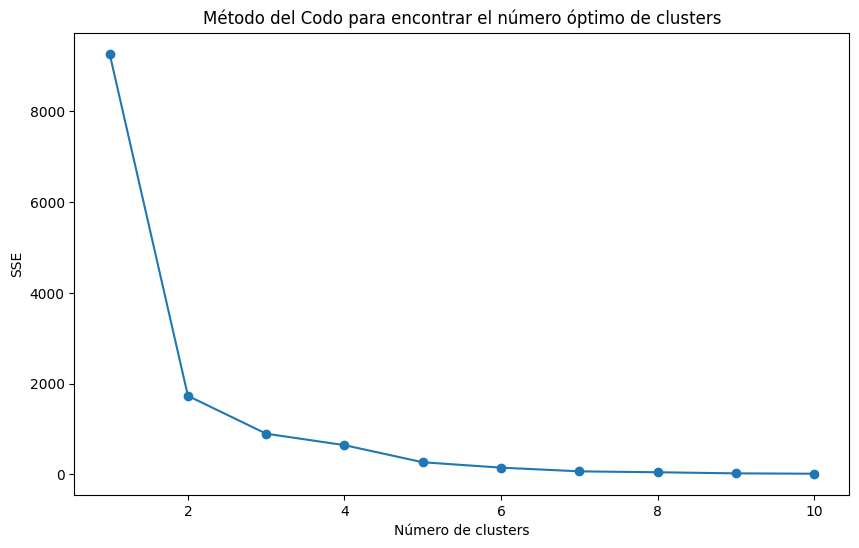

In [91]:
# Importar librerías para visualización
from sklearn.cluster import KMeans # pip install scikit-learn
import matplotlib.pyplot as plt
import seaborn as sns

# Selección de variables relevantes para la segmentación
# Edad e Ingreso_mensual_normalizado
x = muestra[['Edad', 'Ingreso_mensual_normalizado']]
# Encontrar el número óptimo de clusters utilizando el método del codo
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(x)
    sse.append(kmeans.inertia_)
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.title('Método del Codo para encontrar el número óptimo de clusters')
plt.xlabel('Número de clusters')
plt.ylabel('SSE') # mide que tan lenjos están los puntos de su centroide
plt.show()

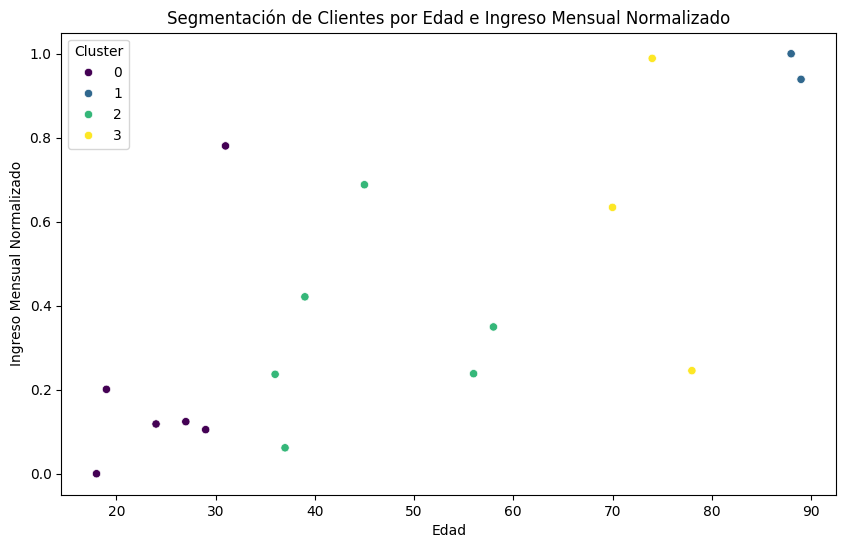

In [92]:
# Aplicar KMeans con el número óptimo de clusters
kmeans = KMeans(n_clusters=4, random_state=0)
muestra['Cluster'] = kmeans.fit_predict(x)
# Visualizar los clusters
plt.figure(figsize=(10, 6)) 
sns.scatterplot(data=muestra, x='Edad', y='Ingreso_mensual_normalizado', hue='Cluster', palette='viridis')
plt.title('Segmentación de Clientes por Edad e Ingreso Mensual Normalizado')
plt.xlabel('Edad')
plt.ylabel('Ingreso Mensual Normalizado')   
plt.show()

    ID_cliente  Edad  Ingreso_mensual Categoría    Ciudad    País  \
230     ID_246  70.0         11927.53         A  Ciudad_a     NaN   
57      ID_116  78.0          5799.32         A  Ciudad_a     NaN   
393     ID_394  58.0          7439.77         A  Ciudad_a     NaN   
249     ID_250  45.0         12777.62         A  Ciudad_a     NaN   
272     ID_273  36.0          5662.07         A  Ciudad_a     NaN   
314     ID_315  27.0          3884.64         B  Ciudad_a  Pais_X   
125     ID_126  56.0          5685.07         B  Ciudad_a     NaN   
153     ID_154  31.0         14234.22         B  Ciudad_a  Pais_X   
331     ID_332  37.0          2903.06         B  Ciudad_a  Pais_X   
307     ID_308  19.0          5097.94         B  Ciudad_a  Pais_Y   
42      ID_043  89.0         16732.84         B  Ciudad_a     NaN   
345     ID_346  88.0         17694.74         B  Ciudad_b  Pais_X   
325     ID_326  39.0          8570.03         B  Ciudad_b     NaN   
155     ID_156  74.0         17520

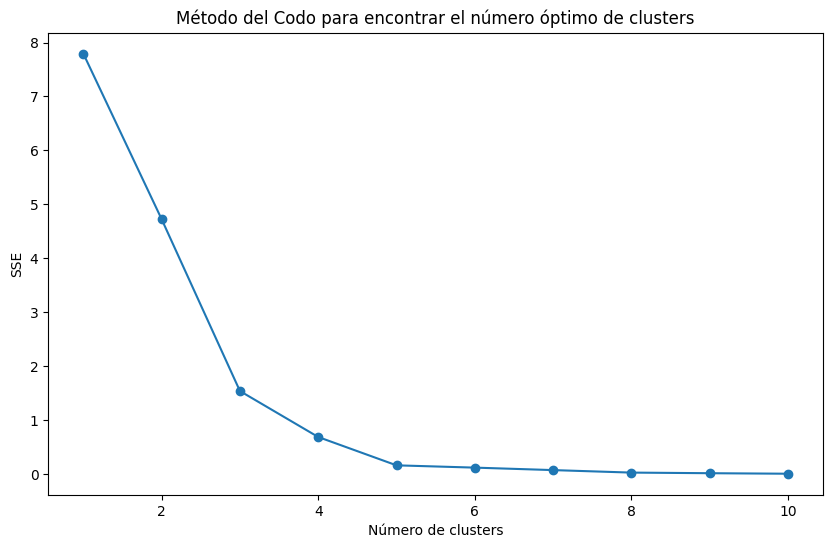

In [93]:
from sklearn.preprocessing import LabelEncoder
# Selección de variables relevantes para la segmentación
# Ciudad e Ingreso_mensual_normalizado
# Asignar un numero a cada ciudad
le = LabelEncoder() 
# Selección de variables relevantes para la segmentación
muestra['Ciudad_codigo'] = le.fit_transform(muestra['Ciudad'])
# Selección de variables relevantes para la segmentación
x = muestra[['Ciudad_codigo', 'Ingreso_mensual_normalizado']]
print(muestra)
# Encontrar el número óptimo de clusters utilizando el método del codo
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(x)
    sse.append(kmeans.inertia_)
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.title('Método del Codo para encontrar el número óptimo de clusters')
plt.xlabel('Número de clusters')
plt.ylabel('SSE') # mide que tan lenjos están los puntos de su centroide
plt.show()

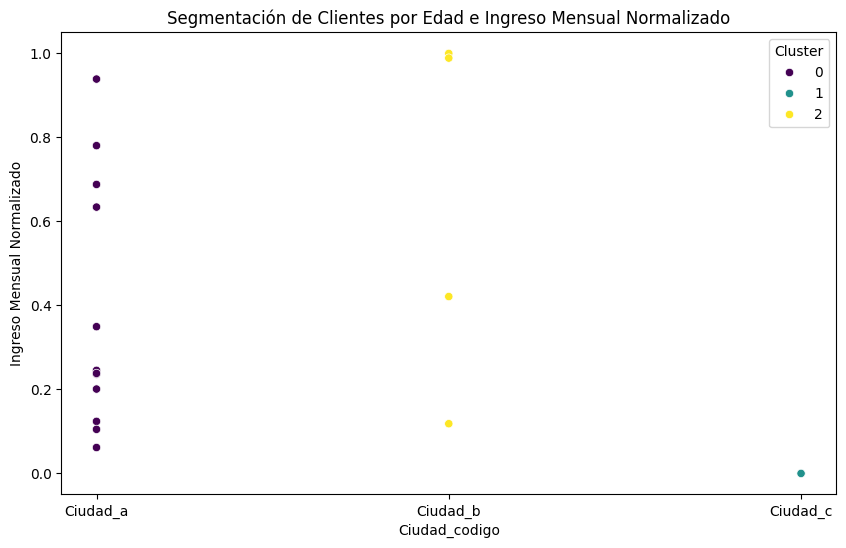

In [98]:
# Aplicar KMeans con el número óptimo de clusters
kmeans = KMeans(n_clusters=3, random_state=0)
muestra['Cluster'] = kmeans.fit_predict(x)
# Visualizar los clusters
plt.figure(figsize=(10, 6)) 
sns.scatterplot(data=muestra, x='Ciudad', y='Ingreso_mensual_normalizado', hue='Cluster', palette='viridis')
plt.title('Segmentación de Clientes por Edad e Ingreso Mensual Normalizado')
plt.xlabel('Ciudad_codigo')
plt.ylabel('Ingreso Mensual Normalizado')   
plt.show()